In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


In [21]:
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")

In [22]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

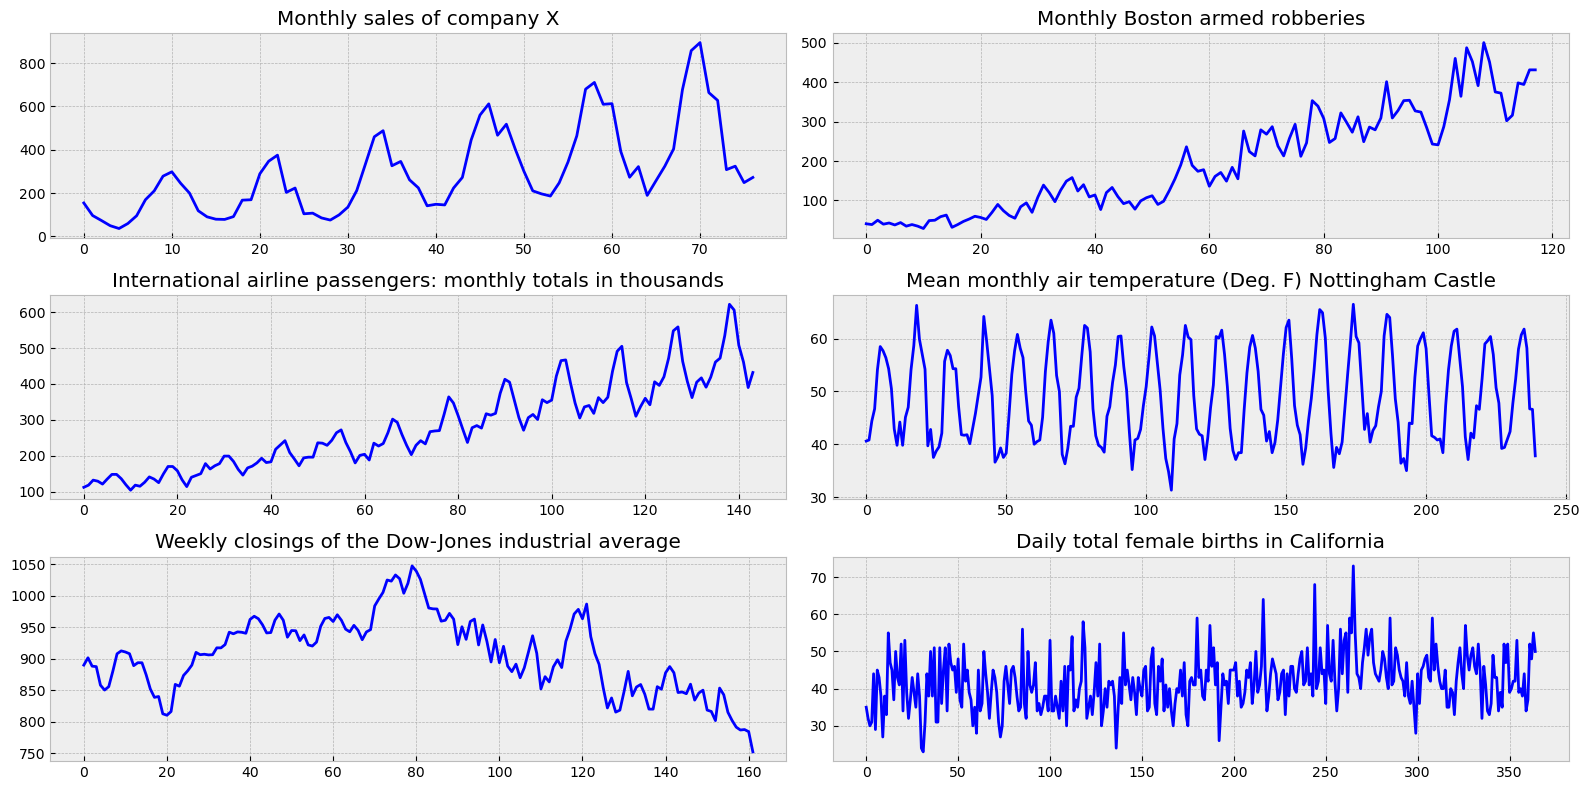

In [23]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

#####################Ряд 1

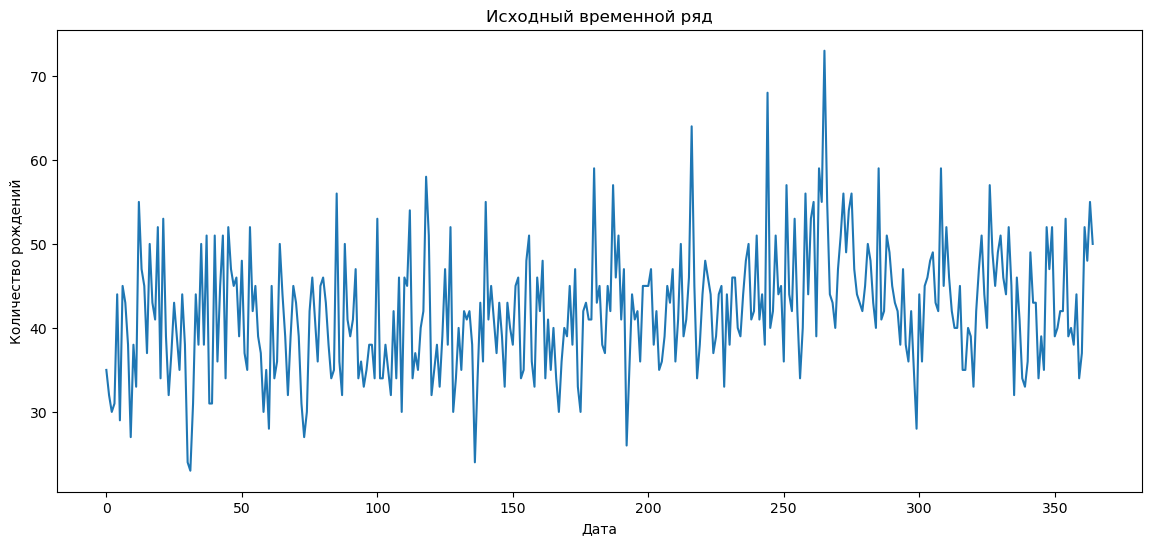

In [31]:
plt.figure(figsize=(14, 6))
plt.plot(female_births['Count'])
plt.title('Исходный временной ряд')
plt.xlabel('Дата')
plt.ylabel('Количество рождений')
plt.show()

In [26]:
result = adfuller(female_births['Count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05


In [33]:
# 1. Дифференцирование
female_births['diff'] = female_births['Count'].diff().dropna()

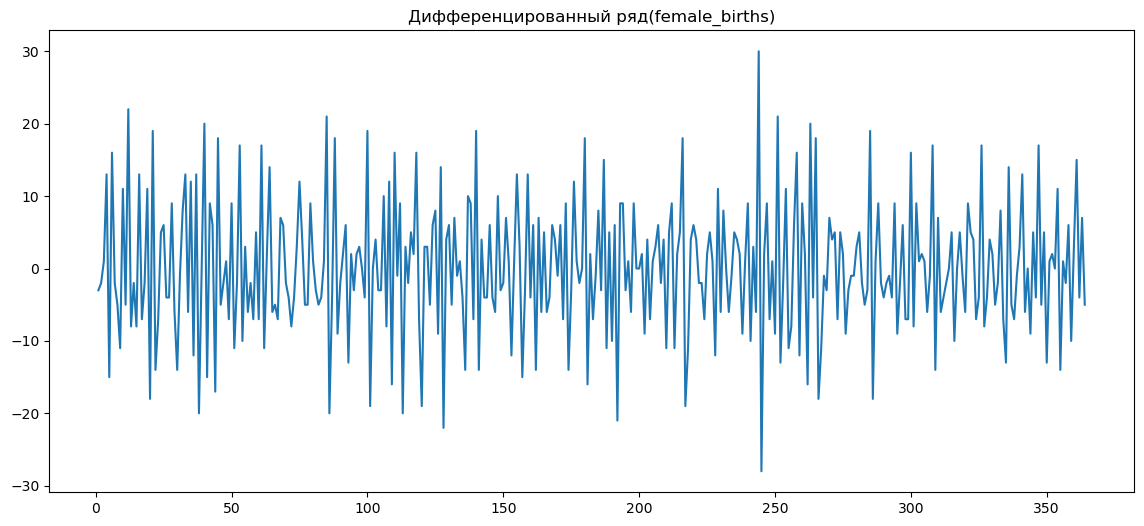

In [29]:
plt.figure(figsize=(14, 6))
plt.plot(female_births['diff'])
plt.title('Дифференцированный ряд(female_births)')
plt.show()

In [32]:
# 2. Логарифмическое преобразование
female_births['log'] = np.log(female_births['Count'])

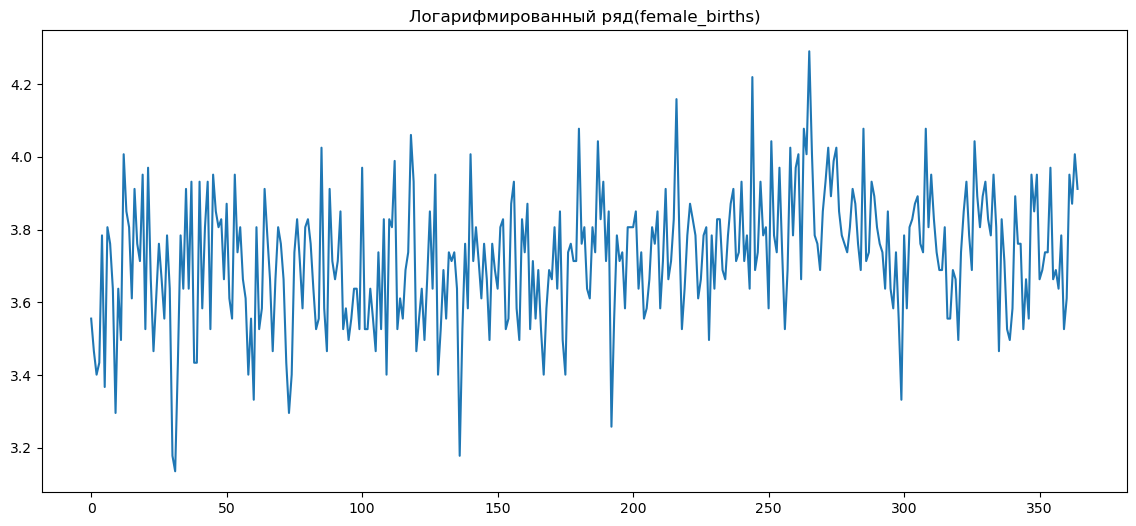

In [35]:
plt.figure(figsize=(14, 6))
plt.plot(female_births['log'])
plt.title('Логарифмированный ряд(female_births)')
plt.show()

In [38]:
result_transformed = adfuller(female_births['log'].dropna())
print("\nПроверка стационарности после преобразований:")
print(f"ADF Statistic: {result_transformed[0]}")
print(f"p-value: {result_transformed[1]}")


Проверка стационарности после преобразований:
ADF Statistic: -4.3531731518823245
p-value: 0.00035889654490254863


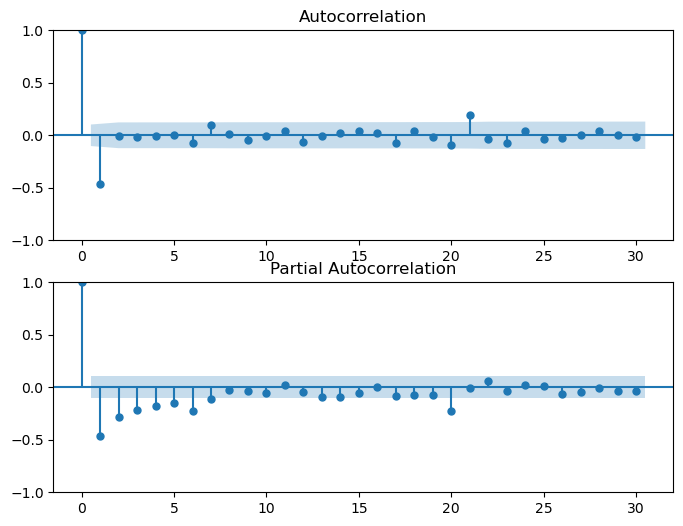

In [36]:
# Анализ автокорреляции
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(female_births['diff'].dropna(), ax=ax1, lags=30)
plot_pacf(female_births['diff'].dropna(), ax=ax2, lags=30)
plt.show()

#######################################Ряд 2

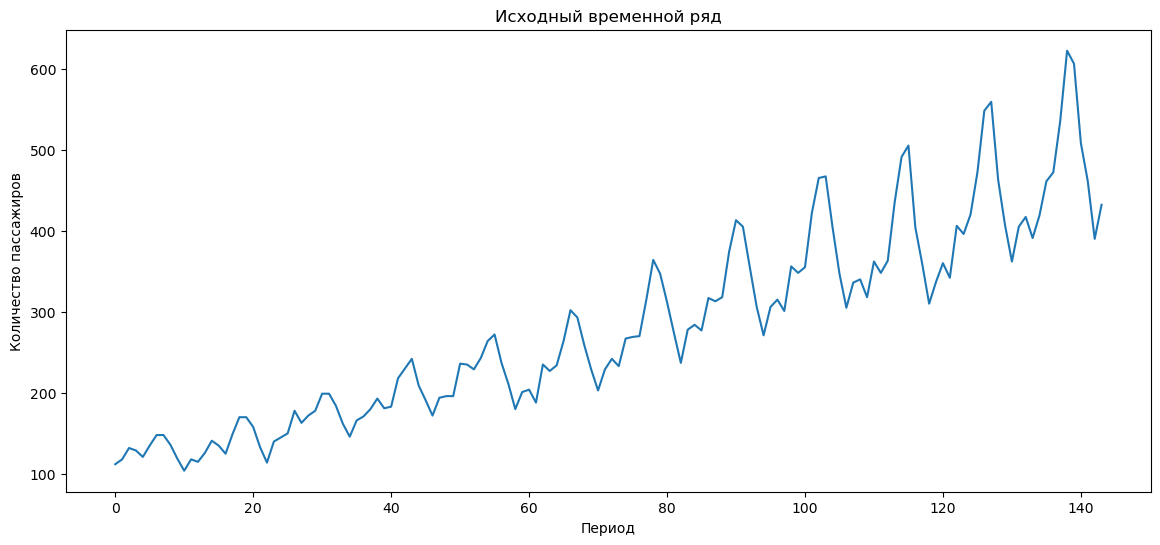

In [43]:
plt.figure(figsize=(14, 6))
plt.plot(airlines_passengers['Count'])
plt.title('Исходный временной ряд')
plt.xlabel('Период')
plt.ylabel('Количество пассажиров')
plt.show()

In [44]:
result_original = adfuller(airlines_passengers['Count'])
print("Результаты для исходного ряда:")
print(f"ADF Statistic: {result_original[0]}")
print(f"p-value: {result_original[1]}")

Результаты для исходного ряда:
ADF Statistic: 0.8153688792060435
p-value: 0.9918802434376409


In [45]:
# 1. Дифференцирование
airlines_passengers['diff'] = airlines_passengers['Count'].diff().dropna()

# 2. Логарифмическое преобразование
airlines_passengers['log'] = np.log(airlines_passengers['Count'])

# 3. Дифференцирование логарифмического ряда
airlines_passengers['log_diff'] = airlines_passengers['log'].diff().dropna()

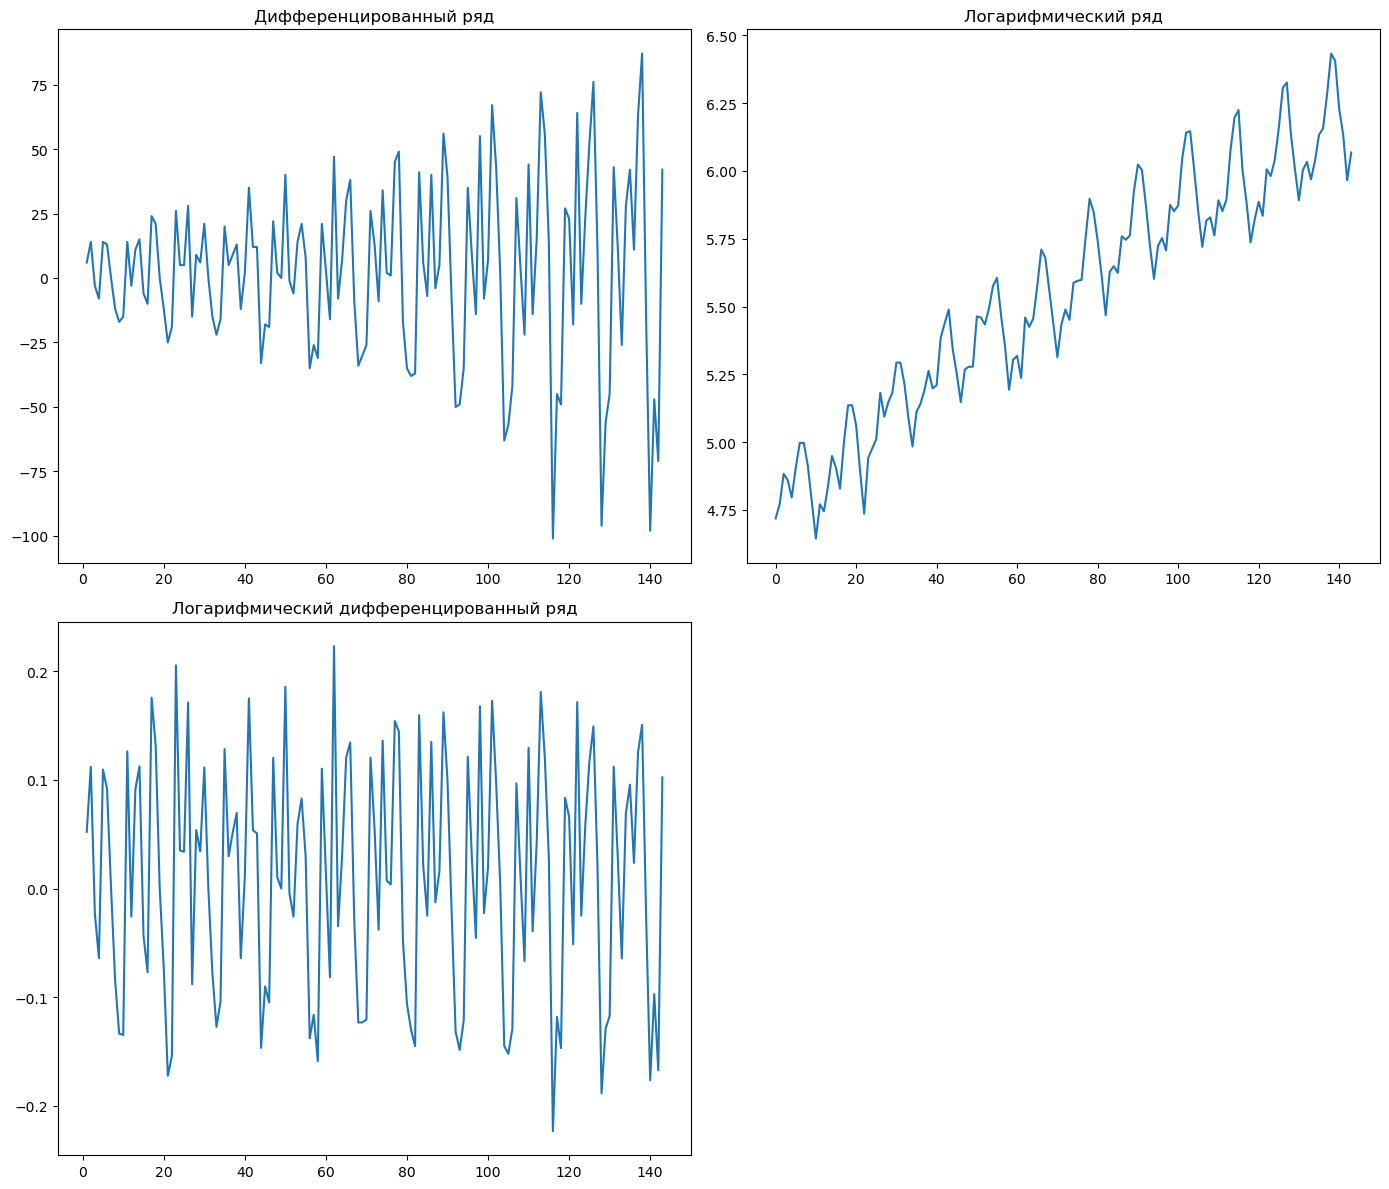

In [46]:
# Визуализация преобразованных рядов
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(airlines_passengers['diff'])
plt.title('Дифференцированный ряд')

plt.subplot(222)
plt.plot(airlines_passengers['log'])
plt.title('Логарифмический ряд')

plt.subplot(223)
plt.plot(airlines_passengers['log_diff'])
plt.title('Логарифмический дифференцированный ряд')

plt.tight_layout()
plt.show()

In [47]:
result_transformed = adfuller(airlines_passengers['log_diff'].dropna())
print("\nРезультаты для преобразованного ряда:")
print(f"ADF Statistic: {result_transformed[0]}")
print(f"p-value: {result_transformed[1]}")


Результаты для преобразованного ряда:
ADF Statistic: -2.7171305983880822
p-value: 0.07112054815086723


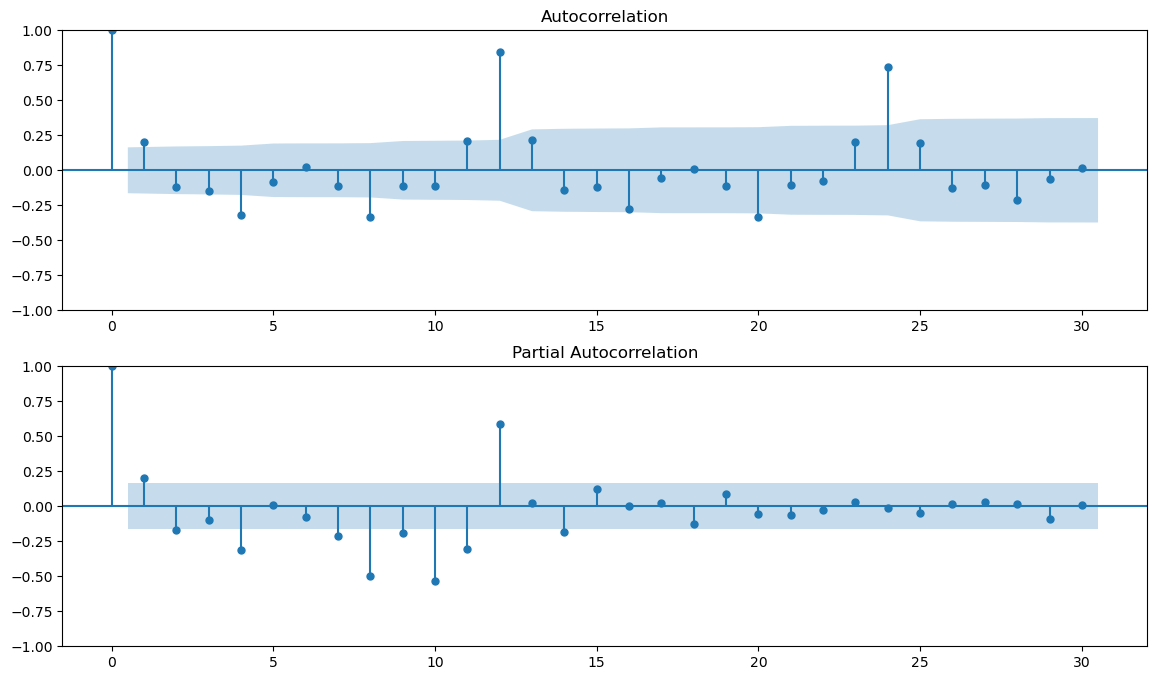

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(airlines_passengers['log_diff'].dropna(), ax=ax1, lags=30)
plot_pacf(airlines_passengers['log_diff'].dropna(), ax=ax2, lags=30)
plt.show()

##############Ряд3

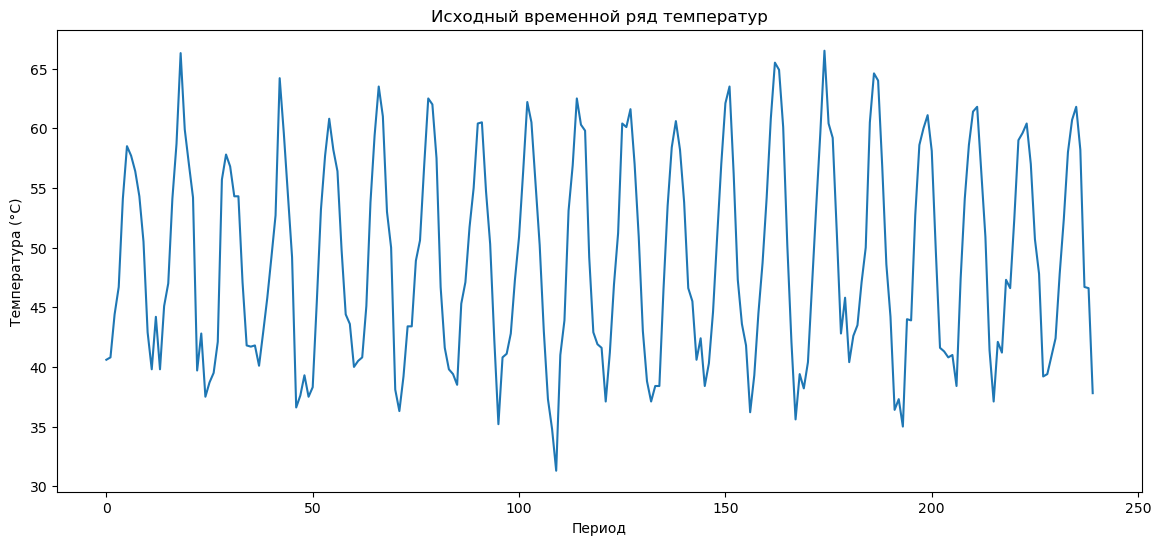

In [50]:
plt.figure(figsize=(14, 6))
plt.plot(mean_monthly_temp['Deg'])
plt.title('Исходный временной ряд температур')
plt.xlabel('Период')
plt.ylabel('Температура (°C)')
plt.show()

In [51]:
result_original = adfuller(mean_monthly_temp['Deg'])
print("Результаты для исходного ряда:")
print(f"ADF Statistic: {result_original[0]}")
print(f"p-value: {result_original[1]}")

Результаты для исходного ряда:
ADF Statistic: -3.255492403086326
p-value: 0.016989030222609128


In [52]:
# Преобразование ряда
# 1. Дифференцирование
mean_monthly_temp['diff'] = mean_monthly_temp['Deg'].diff().dropna()

# 2. Логарифмическое преобразование
mean_monthly_temp['log'] = np.log(mean_monthly_temp['Deg'])

# 3. Дифференцирование логарифмического ряда
mean_monthly_temp['log_diff'] = mean_monthly_temp['log'].diff().dropna()

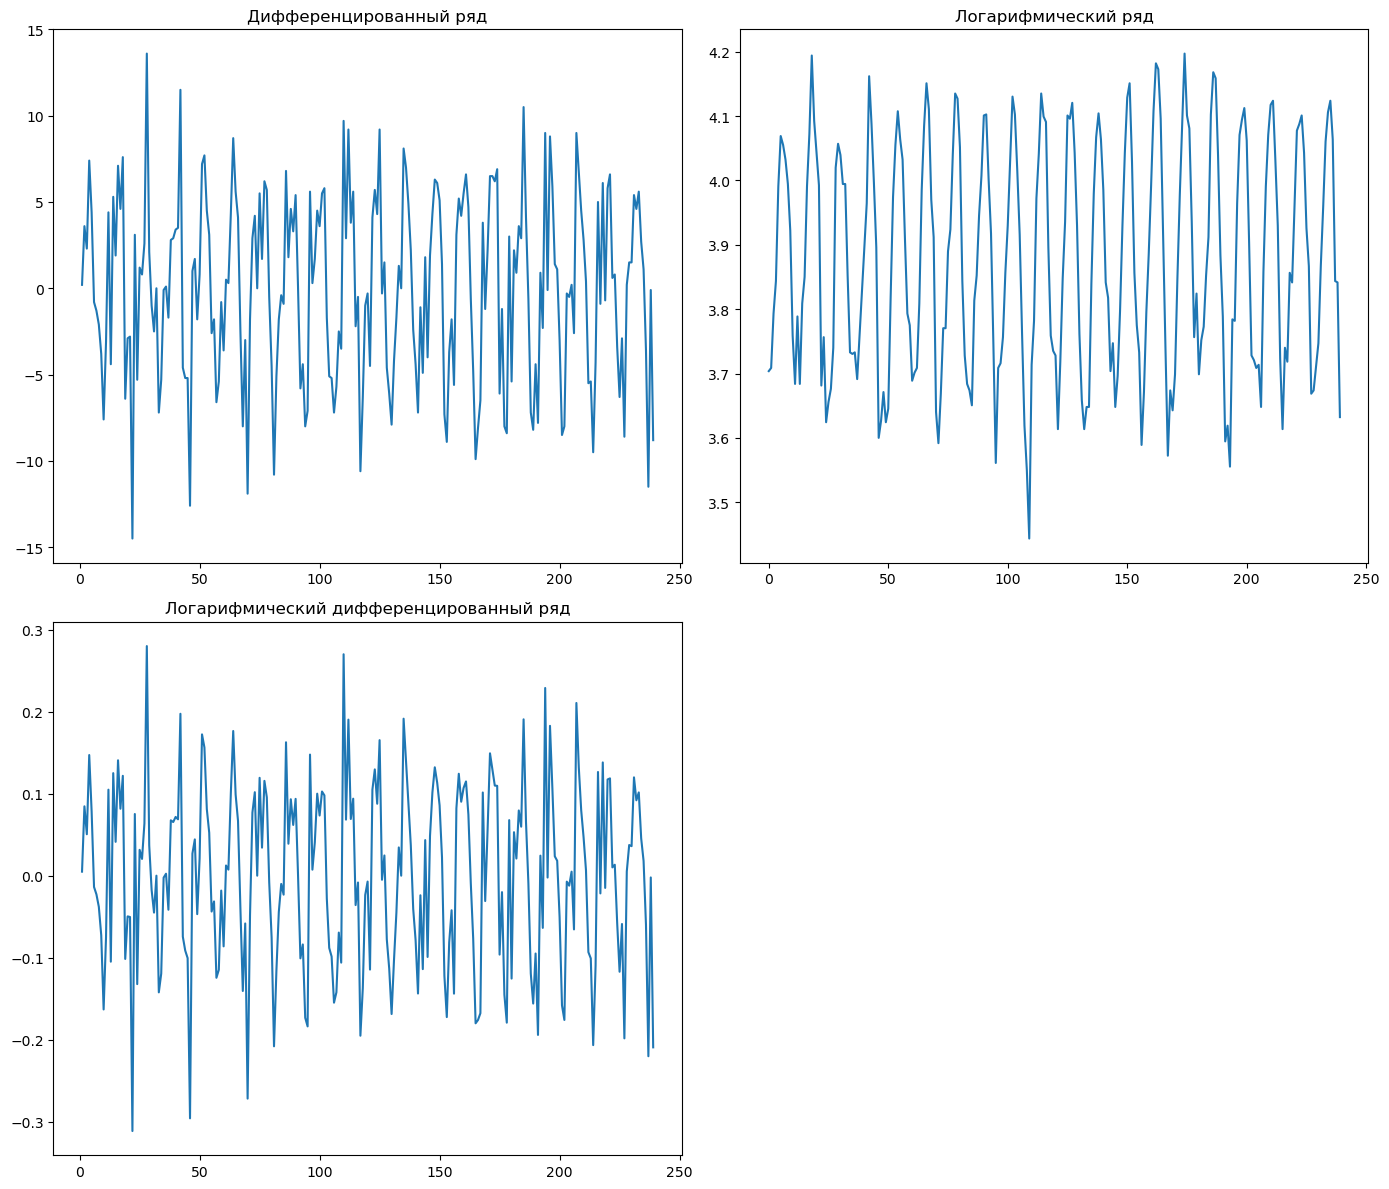

In [53]:
# Визуализация преобразованных рядов
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(mean_monthly_temp['diff'])
plt.title('Дифференцированный ряд')

plt.subplot(222)
plt.plot(mean_monthly_temp['log'])
plt.title('Логарифмический ряд')

plt.subplot(223)
plt.plot(mean_monthly_temp['log_diff'])
plt.title('Логарифмический дифференцированный ряд')

plt.tight_layout()
plt.show()

In [54]:
result_transformed = adfuller(mean_monthly_temp['log_diff'].dropna())
print("\nРезультаты для преобразованного ряда:")
print(f"ADF Statistic: {result_transformed[0]}")
print(f"p-value: {result_transformed[1]}")


Результаты для преобразованного ряда:
ADF Statistic: -12.142259994569828
p-value: 1.6407281304678636e-22


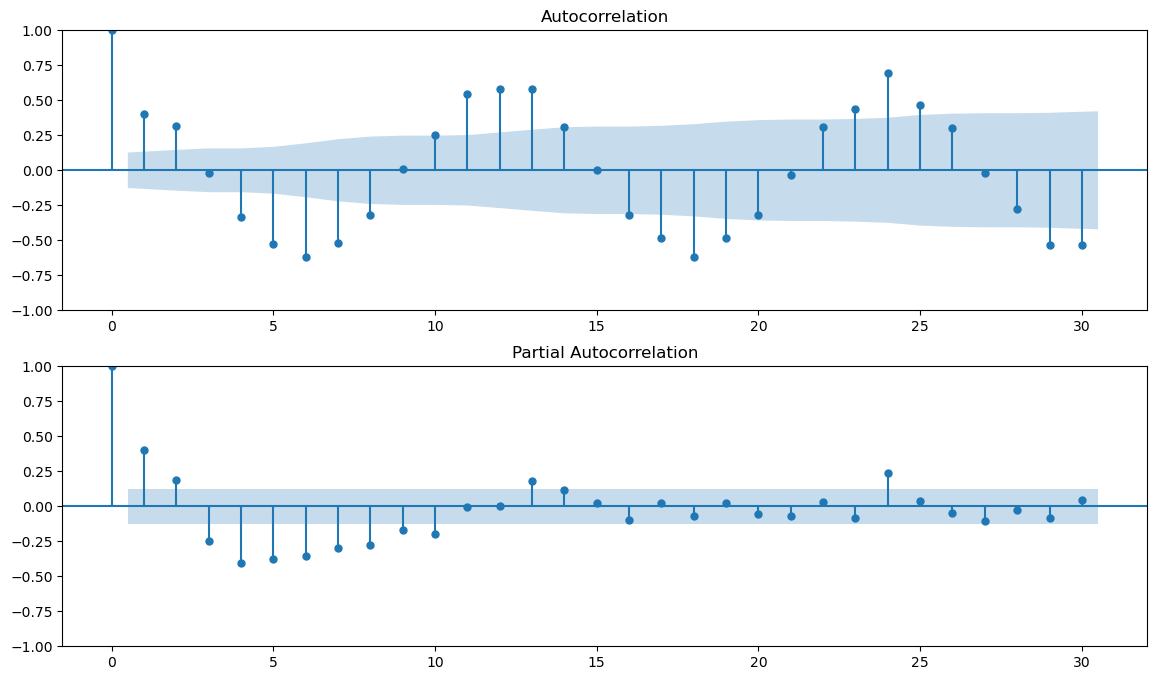

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(mean_monthly_temp['log_diff'].dropna(), ax=ax1, lags=30)
plot_pacf(mean_monthly_temp['log_diff'].dropna(), ax=ax2, lags=30)
plt.show()

#################Ряд 4

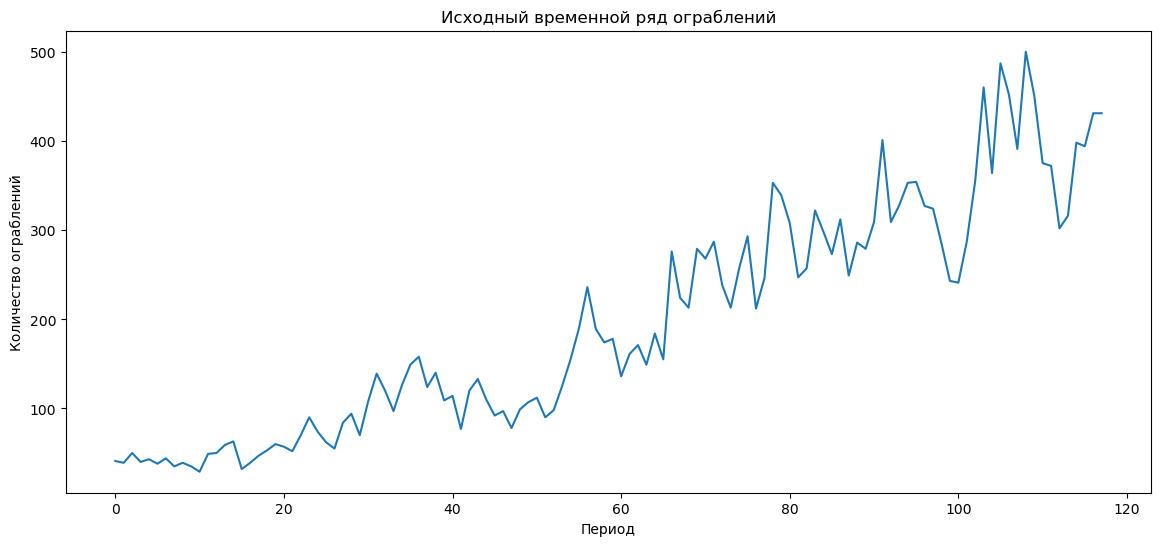

In [56]:
# Визуализация исходного ряда
plt.figure(figsize=(14, 6))
plt.plot(robberies_in_boston['Count'])
plt.title('Исходный временной ряд ограблений')
plt.xlabel('Период')
plt.ylabel('Количество ограблений')
plt.show()

In [57]:
# Проверка стационарности исходного ряда
result_original = adfuller(robberies_in_boston['Count'])
print("Результаты для исходного ряда:")
print(f"ADF Statistic: {result_original[0]}")
print(f"p-value: {result_original[1]}")

Результаты для исходного ряда:
ADF Statistic: 1.0011021402458091
p-value: 0.9942775638057233


In [58]:
# Преобразование ряда
# 1. Дифференцирование
robberies_in_boston['diff'] = robberies_in_boston['Count'].diff().dropna()

# 2. Логарифмическое преобразование
robberies_in_boston['log'] = np.log(robberies_in_boston['Count'])

# 3. Дифференцирование логарифмического ряда
robberies_in_boston['log_diff'] = robberies_in_boston['log'].diff().dropna()

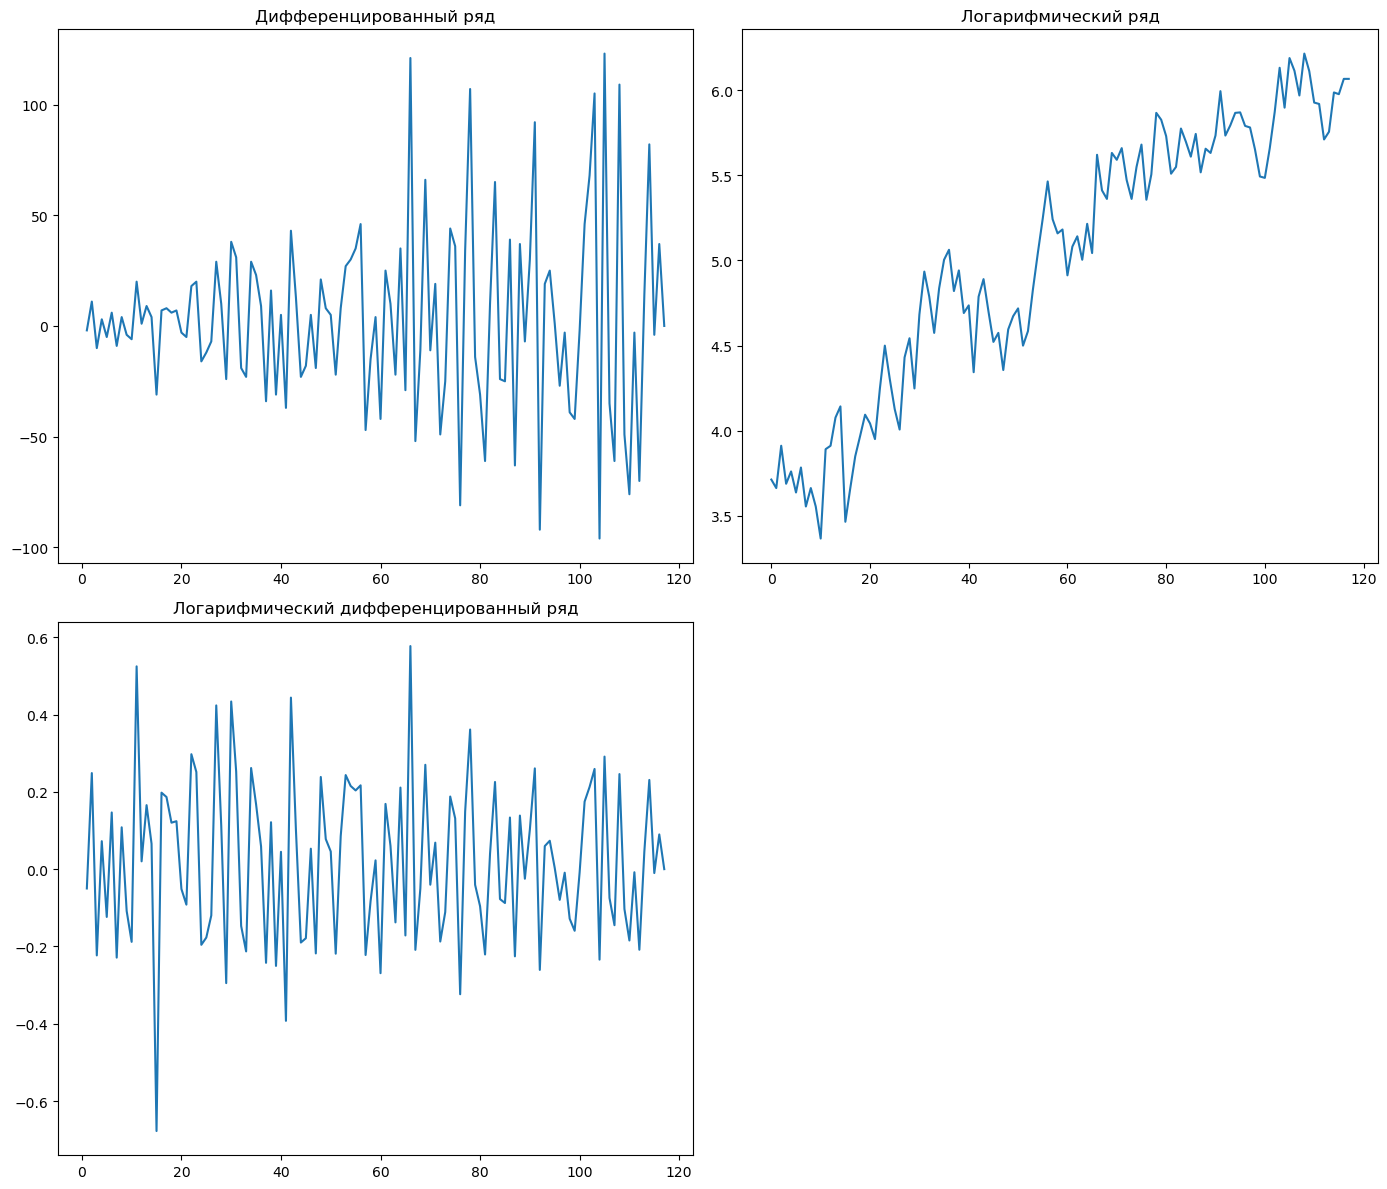

In [59]:
# Визуализация преобразованных рядов
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(robberies_in_boston['diff'])
plt.title('Дифференцированный ряд')

plt.subplot(222)
plt.plot(robberies_in_boston['log'])
plt.title('Логарифмический ряд')

plt.subplot(223)
plt.plot(robberies_in_boston['log_diff'])
plt.title('Логарифмический дифференцированный ряд')

plt.tight_layout()
plt.show()

In [60]:
result_transformed = adfuller(robberies_in_boston['log_diff'].dropna())
print("\nРезультаты для преобразованного ряда:")
print(f"ADF Statistic: {result_transformed[0]}")
print(f"p-value: {result_transformed[1]}")


Результаты для преобразованного ряда:
ADF Statistic: -7.601792127269038
p-value: 2.378602441743846e-11


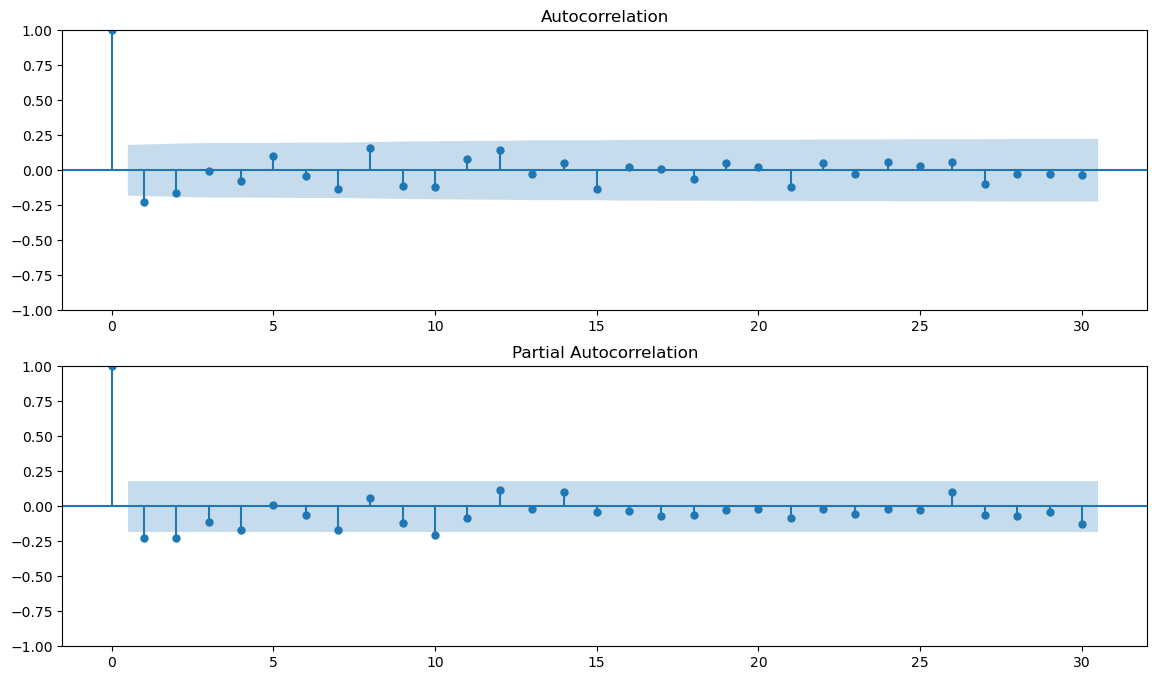

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(robberies_in_boston['log_diff'].dropna(), ax=ax1, lags=30)
plot_pacf(robberies_in_boston['log_diff'].dropna(), ax=ax2, lags=30)
plt.show()

###################Ряд 5

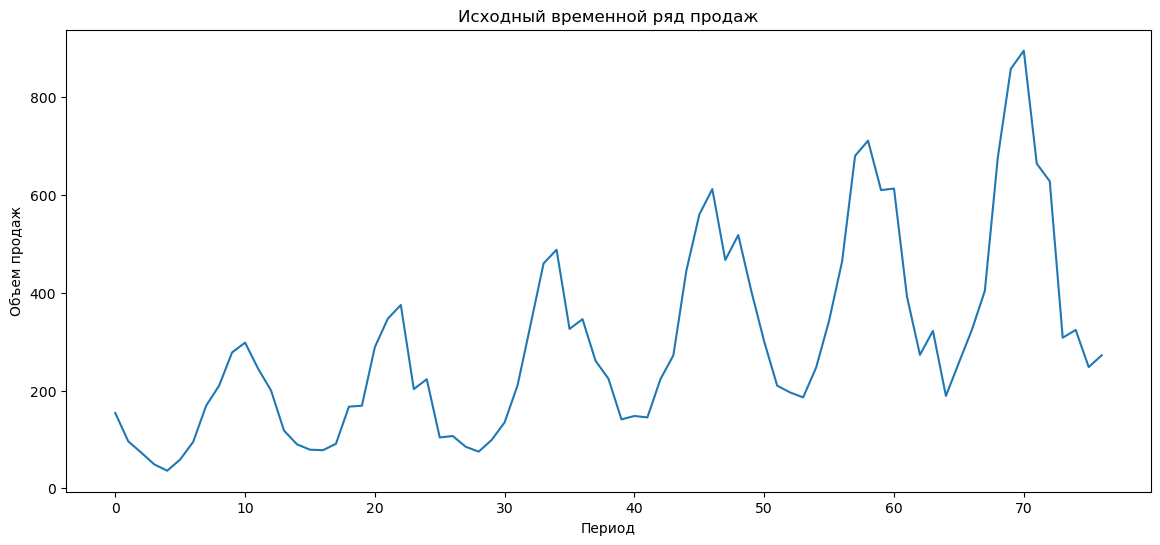

In [62]:
# Визуализация исходного ряда
plt.figure(figsize=(14, 6))
plt.plot(sales_of_company_x['Count'])
plt.title('Исходный временной ряд продаж')
plt.xlabel('Период')
plt.ylabel('Объем продаж')
plt.show()

In [63]:
result_original = adfuller(sales_of_company_x['Count'])
print("Результаты для исходного ряда:")
print(f"ADF Statistic: {result_original[0]}")
print(f"p-value: {result_original[1]}")

Результаты для исходного ряда:
ADF Statistic: 0.6547150829524478
p-value: 0.9888894205170052


In [64]:
# Преобразование ряда
# 1. Дифференцирование
sales_of_company_x['diff'] = sales_of_company_x['Count'].diff().dropna()

# 2. Логарифмическое преобразование
sales_of_company_x['log'] = np.log(sales_of_company_x['Count'])

# 3. Дифференцирование логарифмического ряда
sales_of_company_x['log_diff'] = sales_of_company_x['log'].diff().dropna()

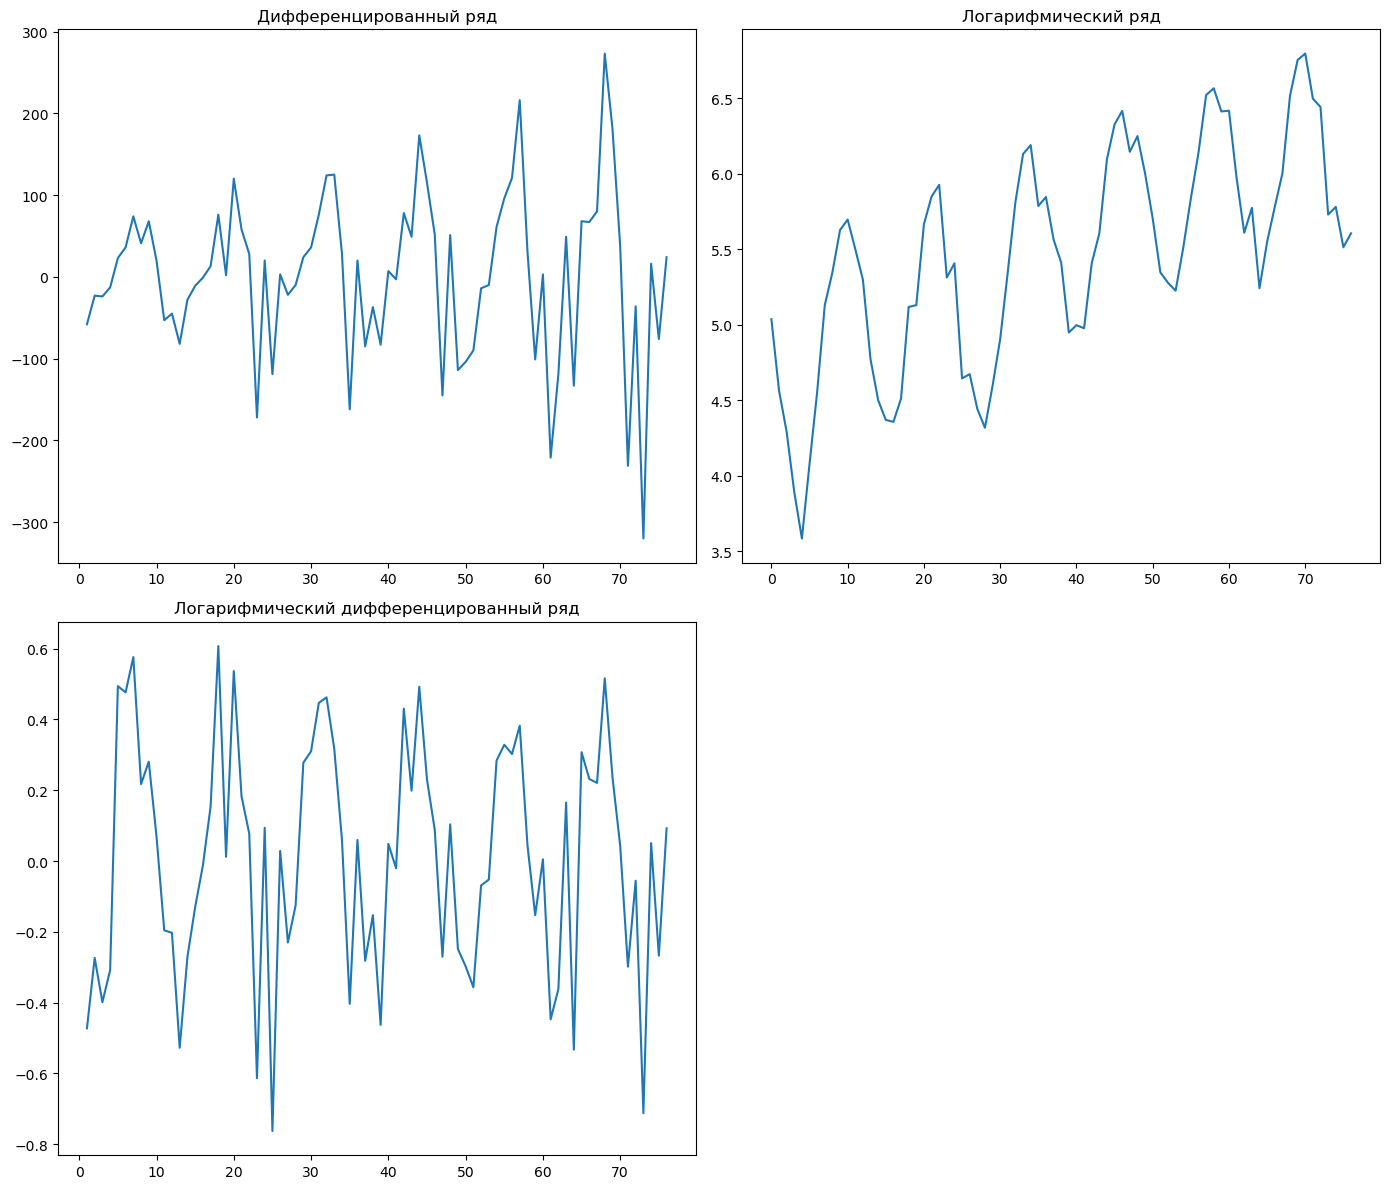

In [65]:
# Визуализация преобразованных рядов
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(sales_of_company_x['diff'])
plt.title('Дифференцированный ряд')

plt.subplot(222)
plt.plot(sales_of_company_x['log'])
plt.title('Логарифмический ряд')

plt.subplot(223)
plt.plot(sales_of_company_x['log_diff'])
plt.title('Логарифмический дифференцированный ряд')

plt.tight_layout()
plt.show()

In [66]:
# Проверка стационарности после преобразований
result_transformed = adfuller(sales_of_company_x['log_diff'].dropna())
print("\nРезультаты для преобразованного ряда:")
print(f"ADF Statistic: {result_transformed[0]}")
print(f"p-value: {result_transformed[1]}")


Результаты для преобразованного ряда:
ADF Statistic: -3.135643801006634
p-value: 0.024025392839875277


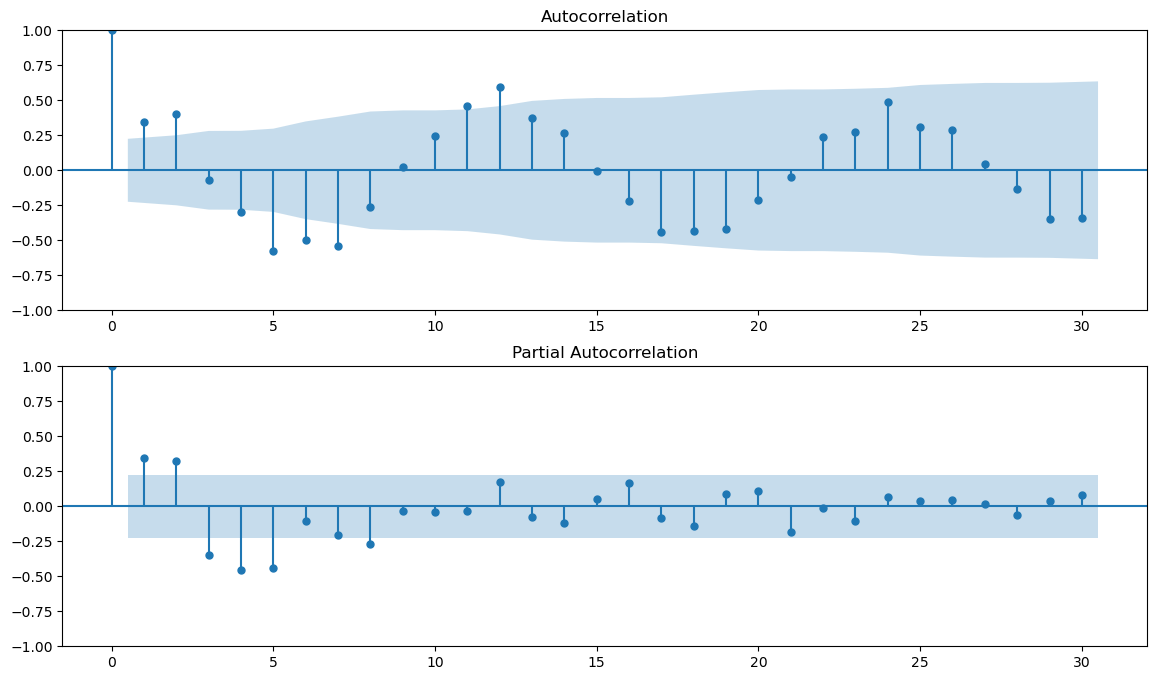

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(sales_of_company_x['log_diff'].dropna(), ax=ax1, lags=30)
plot_pacf(sales_of_company_x['log_diff'].dropna(), ax=ax2, lags=30)
plt.show()

################Ряд6

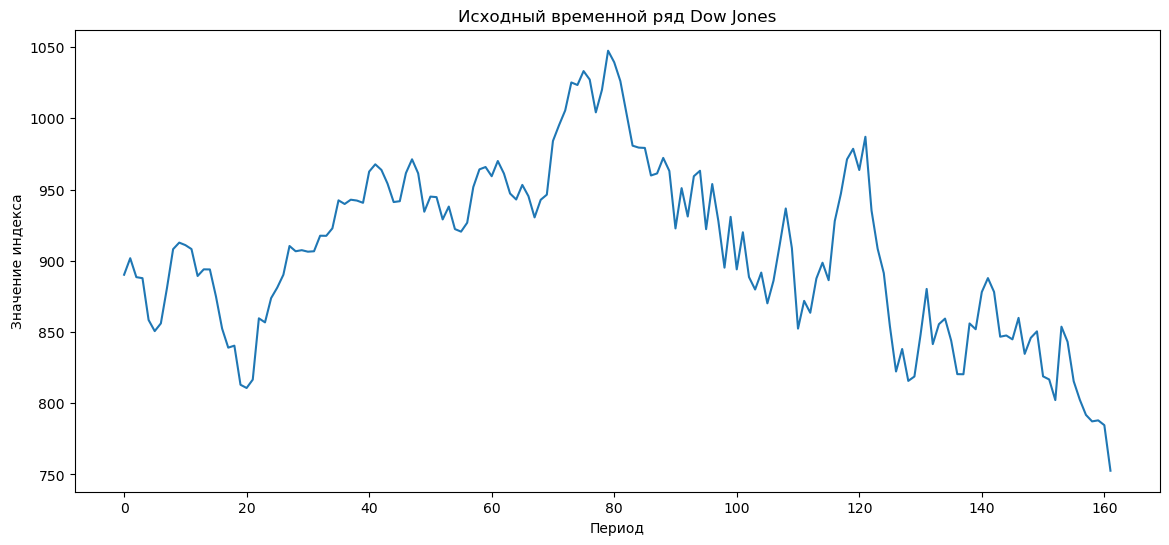

In [68]:
# Визуализация исходного ряда
plt.figure(figsize=(14, 6))
plt.plot(dowjones_closing['Close'])
plt.title('Исходный временной ряд Dow Jones')
plt.xlabel('Период')
plt.ylabel('Значение индекса')
plt.show()

In [69]:
# Проверка стационарности исходного ряда
result_original = adfuller(dowjones_closing['Close'])
print("Результаты для исходного ряда:")
print(f"ADF Statistic: {result_original[0]}")
print(f"p-value: {result_original[1]}")

Результаты для исходного ряда:
ADF Statistic: -1.3146254984911712
p-value: 0.6224548515589721


In [70]:
# Преобразование ряда
# 1. Дифференцирование
dowjones_closing['diff'] = dowjones_closing['Close'].diff().dropna()

# 2. Логарифмическое преобразование
dowjones_closing['log'] = np.log(dowjones_closing['Close'])

# 3. Дифференцирование логарифмического ряда
dowjones_closing['log_diff'] = dowjones_closing['log'].diff().dropna()

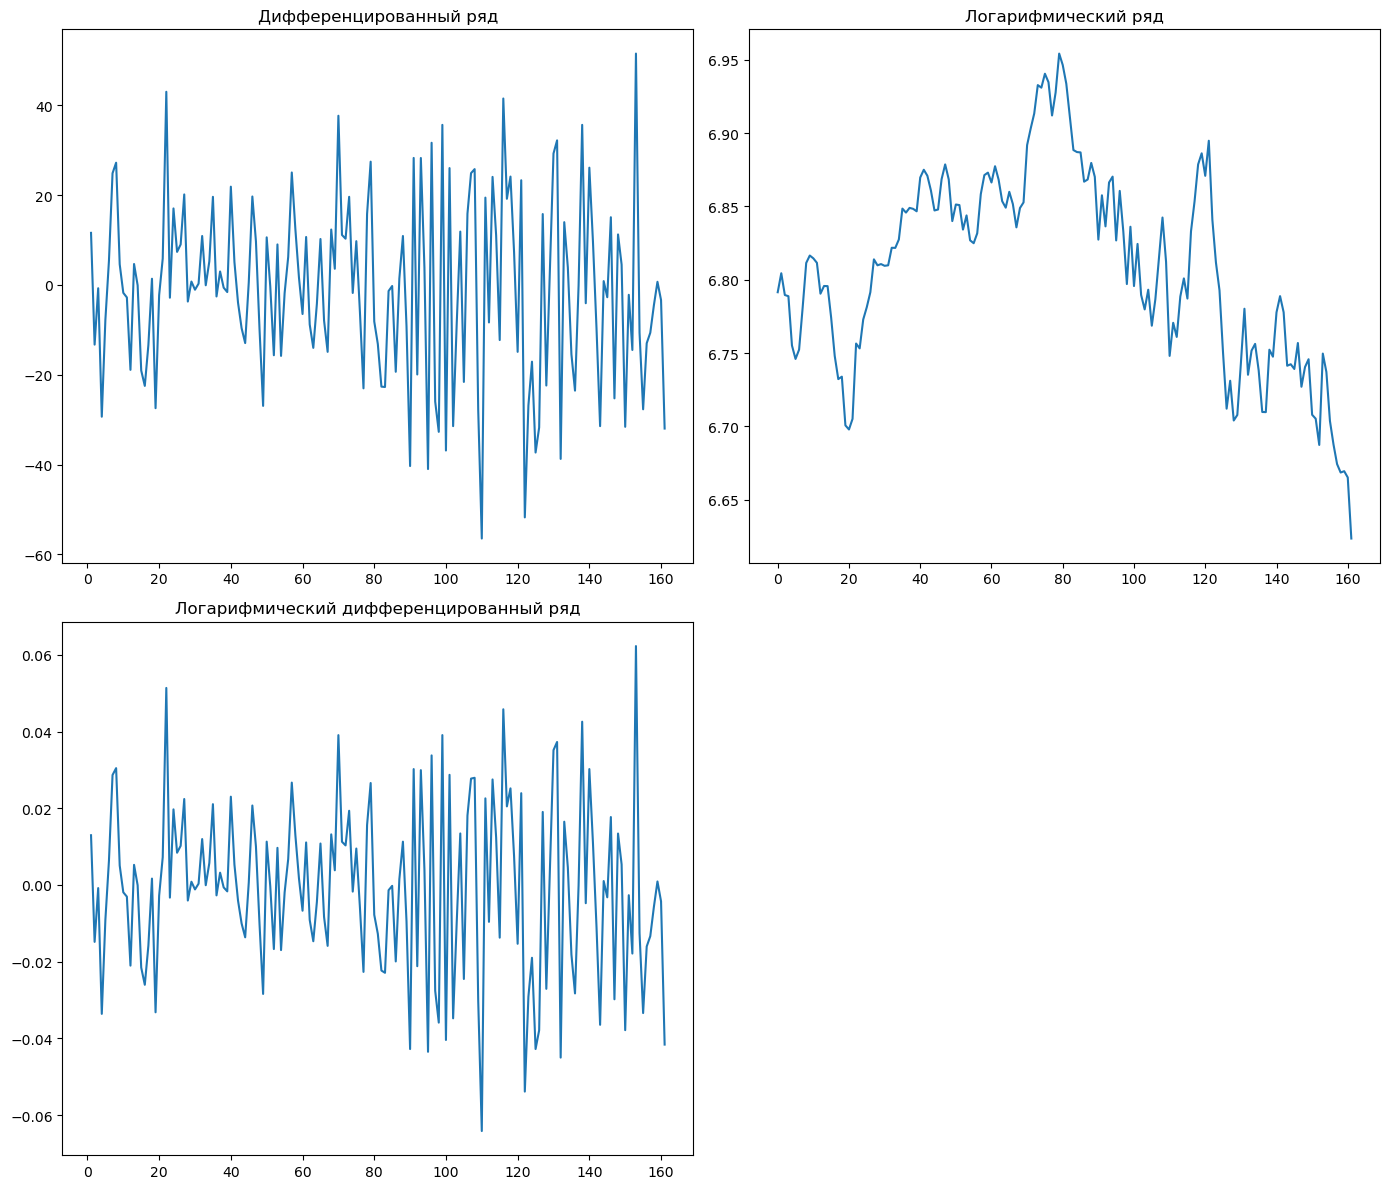

In [71]:
# Визуализация преобразованных рядов
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(dowjones_closing['diff'])
plt.title('Дифференцированный ряд')

plt.subplot(222)
plt.plot(dowjones_closing['log'])
plt.title('Логарифмический ряд')

plt.subplot(223)
plt.plot(dowjones_closing['log_diff'])
plt.title('Логарифмический дифференцированный ряд')

plt.tight_layout()
plt.show()


In [72]:
# Проверка стационарности после преобразований
result_transformed = adfuller(dowjones_closing['log_diff'].dropna())
print("\nРезультаты для преобразованного ряда:")
print(f"ADF Statistic: {result_transformed[0]}")
print(f"p-value: {result_transformed[1]}")


Результаты для преобразованного ряда:
ADF Statistic: -12.995820716080093
p-value: 2.751609132291384e-24


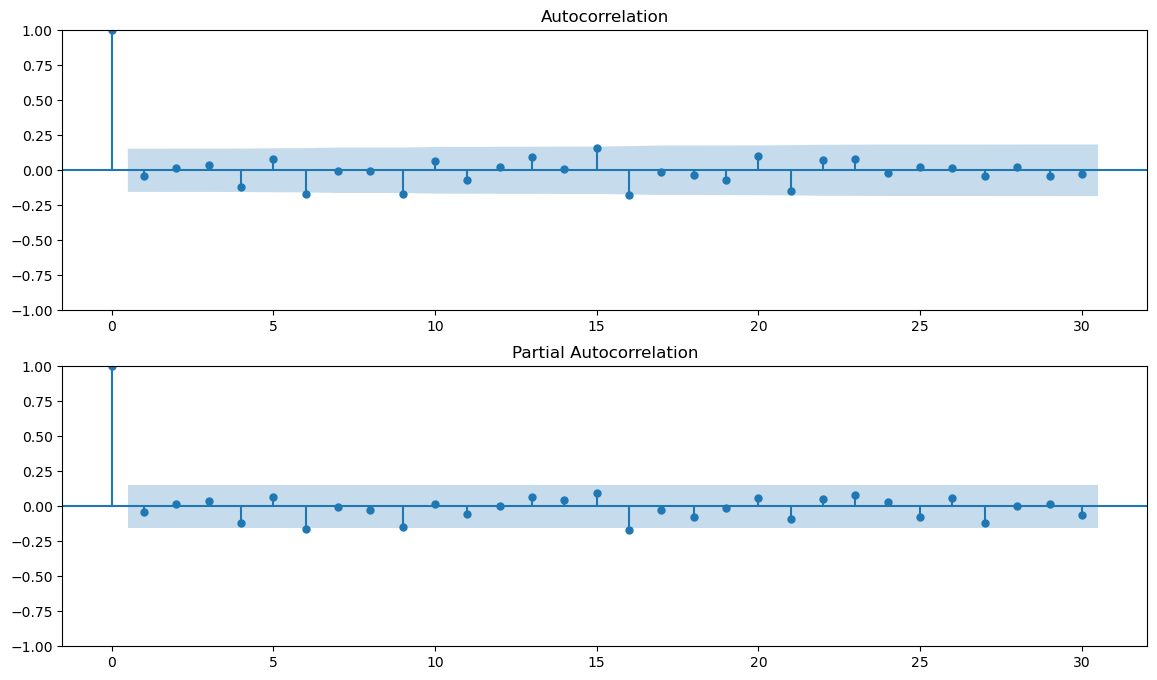

In [73]:
# Анализ автокорреляции
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(dowjones_closing['log_diff'].dropna(), ax=ax1, lags=30)
plot_pacf(dowjones_closing['log_diff'].dropna(), ax=ax2, lags=30)
plt.show()